In [1]:
import subprocess
import shlex
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.table import Column
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
import glob
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
import gc
import astropy
from scipy import interpolate
import pickle
from astropy.time import Time

In [2]:
basedir = "/home/xhall/Documents/"
source = basedir + "NewZTF/sample_2020/SNIDoutput/"
source2 = "/home/xhall/Documents/ZTFI/remaining_output/"
output = basedir + "ZTFI/BTS_all_output/"

sample200 = Table.from_pandas(pd.read_csv(basedir + "NewZTF/ML_sample_snid200.csv"))
ML_sample_snid_examples = Table.from_pandas(pd.read_csv(basedir + "NewZTF/ML_sample_snid_brightexamples.csv"))
sample_2018 = Table.from_pandas(pd.read_csv(basedir + "NewZTF/sample_2018/ML_sample_snid_norepeat_2018.csv"))
sample_2020 = Table.from_pandas(pd.read_csv("/home/xhall/Documents/NewZTF/sample_2020/SNID_2020_output.csv"))
sample_remaining = Table.from_pandas(pd.read_csv("/home/xhall/Documents/ZTFI/SNID_2020_remaining_output.csv"))
#superfit_results = Table.from_pandas(pd.read_csv("/home/xhall/Documents/Superfit/superfit_classes_ZTFI.csv"))
a_file = open("/home/xhall/Documents/Superfit/short_path_dict.pkl", "rb")
short_path_dict = pickle.load(a_file)
phase_data = Table.from_pandas(pd.read_csv("/home/xhall/Documents/ZTFI/phase.csv"))

In [3]:
final_rcf_table = Table.from_pandas(pd.read_hdf(r"/home/xhall/Documents/NewZTF/final_rcf_table.h5"))

In [4]:
superfit_results = Table.from_pandas(pd.read_csv("/home/xhall/Documents/ZTFI/CSV_results/superfit_classes_ZTFI.csv"))
ztfI_table_snid = Table.from_pandas(pd.read_csv("/home/xhall/Documents/ZTFI/CSV_results/snid_classes_ZTFI.csv"))

In [5]:
superfit_replacements = Table.from_pandas(pd.read_csv("superfit_classes_ZTFI_missing.csv"))

In [6]:
joined_table_right = []
counter = 0
for i in ztfI_table_snid["ZTF_Name"]:
    if(i not in final_rcf_table["ZTF_Name"]):
        joined_table_right.append(counter)
    counter += 1

In [7]:
superfit_replacements[np.where(superfit_replacements["Phase"] == "u")]

Version,Resolution,Superfit_c,Superfit_z,Match,Gal,Frac(SN),Frac(gal),Phase,Av
str39,str42,str18,float64,str55,str3,float64,float64,str7,float64
ZTF18aaaibml_20200214_P200_v1.ascii,binnings/ZTF18aaaibml_20200214_P200_v1,II-flash,0.0348,II-flash/iPTF15crj_early/ALFOSC phase-band : u-,SB3,0.43786549999999996,0.5621345,u,-0.2
ZTF18aabybkt_20180309_P60_v1.ascii,binnings/ZTF18aabybkt_20180309_P60_v1,II-flash,0.007619,II-flash/iPTF15crj_early/GMOS phase-band : u-,SB1,0.8830676,0.11693242,u,1.6
ZTF18aaexyql_20200124_Keck1_v1.ascii,binnings/ZTF18aaexyql_20200124_Keck1_v1,II,0.03,II/iPTF15crj/DBSP phase-band : u-,Sc,0.23081067,0.7691893,u,1.4
ZTF18aahatvc_20200522_P60_v1.ascii,binnings/ZTF18aahatvc_20200522_P60_v1,Ia-CSM,0.08169,Ia-CSM/2016iks/EFOSC2-NTT phase-band : u-,Sc,0.9443309999999999,0.05566904,u,-2.0
ZTF18aahmhxu_20180717_P200_v1.ascii,binnings/ZTF18aahmhxu_20180717_P200_v1,SLSN-IIn,0.16699999999999998,SLSN-IIn/PTF10jwd/LRIS phase-band : u-,Sa,0.8891824,0.110817604,u,-0.8
ZTF18aahqkbt_20180520_P60_v1.ascii,binnings/ZTF18aahqkbt_20180520_P60_v1,II-flash,0.05355,II-flash/iPTF15crj_early/GMOS phase-band : u-,Sc,0.89702946,0.10297056,u,-2.0
ZTF18aaisyyp_20190403_Keck1_v1.ascii,binnings/ZTF18aaisyyp_20190403_Keck1_v1,SLSN-I,0.132,SLSN-I/PTF10nmn/LRIS phase-band : u-,SB2,0.5807971,0.41920292,u,2.0
ZTF18aaizerg_20200114_P60_v1.ascii,binnings/ZTF18aaizerg_20200114_P60_v1,Ia-CSM,0.0667875,Ia-CSM/2019fcg/EFOSC2-NTT phase-band : u-,Sc,0.9905951999999999,0.009404758000000001,u,-2.0
ZTF18aajqcue_20190104_Keck1_v1.ascii,binnings/ZTF18aajqcue_20190104_Keck1_v1,Ca-Ib,0.069825,Ca-Ib/iPTF15eqv/MMT-Blue phase-band : u-,Sb,0.031818226,0.9681818000000001,u,2.0


In [8]:
ztfI_table_snid_no2018 = ztfI_table_snid[joined_table_right]

In [9]:
joined_table = astropy.table.join(ztfI_table_snid_no2018, superfit_results)

In [10]:
joined_table.to_pandas().to_csv("/home/xhall/Documents/ZTFI/CSV_results/superfit_snid_ZTFI_no2018.csv", index = False)

In [11]:
astropy.table.join(ztfI_table_snid_no2018, final_rcf_table)

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,TNS_Name,discovered_by,tns_internal_name,RA_sn,Dec_sn,sn_type,z_sn,g_jd_max,g_max,g_unc_max,r_jd_max,r_max,r_unc_max,ebv,host_name_PS1,RA_host_PS1,Dec_host_PS1,z_host,sep,projected_kpc,gKron_PS1,rKron_PS1,iKron_PS1,zKron_PS1,yKron_PS1,w1_host,w2_host,ebv_host
str39,str12,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,str9,str13,str29,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [12]:
i = joined_table[joined_table["Phase"] > 50000][26]

In [13]:
if(i["Version"] in superfit_replacements["Version"]):
    superfit_phase = superfit_replacements[np.where(i["Version"] == superfit_replacements["Version"])[0]]["Phase"][0]
else:
    superfit_phase = i["Phase"]
superfit_phase

'u'

In [14]:
np.where("binnings/ZTF18aaaibml_20200214_P200.ascii" == superfit_replacements["Version"])

(array([], dtype=int64),)

In [15]:
np.where(joined_table["Version"] == "ZTF21aajgdeu_20210224_LT_v1.ascii")

(array([6084]),)

In [16]:
i

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,Resolution,Superfit_c,Superfit_z,Match,Gal,Frac(SN),Frac(gal),Phase,Av
str39,str12,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,str36,str18,float64,str52,str80,float64,float64,float64,float64
ZTF18abvgjyv_20181201_Keck1_v1.ascii,ZTF18abvgjyv,sn1997X,7.84,0.5239,0.008,0,1,sn1997X,7.84,Ib-norm,0.5239,0.008,2.0,1,2,sn2007fb,7.7,Ia-norm,0.5092,0.0078,99.8,0,3,sn1991N,7.3,Ic-norm,0.5108,0.0101,0.0,1,4,sn1991M,7.3,Ia-norm,0.4986,0.008,80.0,0,7,sn1984L,7.12,Ib-norm,0.512,0.0092,8.0,0,ZTF18abvgjyv_20181201_Keck1_v1_10,II,0.06416000000000001,II/iPTF15crj/FLOYDS-N+2457288.7627315,/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/bank/binnings/10A/gal/SB2,0.94355994,0.05644008,57289.26,-0.6


In [17]:
ZTFid = np.unique(joined_table["ZTF_Name"])

In [18]:
np.save(output + "test_200", np.array(ZTFid[0:200]))

In [19]:
ZTFid_200 = np.load(output+ "test_200.npy")

In [20]:
superfit_outputs = "/home/xhall/Documents/Superfit/ZTFI_output/results/"

In [21]:
objects_list = glob.glob(superfit_outputs+'*.csv') 
len(objects_list)

7771

In [79]:
len(ZTFid)

2922

In [80]:
spec_number_data = []
counter = 0
for j in ZTFid[2800::]:
    if(j in phase_data["ZTFID"]):
        counter += 1
        if(counter % 100 == 0):
            print(counter)
        index = np.where(joined_table["ZTF_Name"] == j)
        spec_num = 1
        for i in joined_table[index]:
            spectra_name = i["Version"].split(".")[0]
            z_snid = i["z_snid"]

            source_folder = source + spectra_name
            files = np.sort(glob.glob(source_folder+"/*.dat"))
            if(len(files) == 0):
                source_folder = source2 + spectra_name
                files = np.sort(glob.glob(source_folder+"/*.dat"))
            if(len(files) != 0):
                files = np.sort(files)
                matches_files = files[0:len(files)-1]
                spectra = Table.read(files[-1], format = "ascii", names = ["wavelength", "flux"])
                match = Table.read(files[0], format = "ascii", names = ["redshifted_wavelength", "flux"])

                low, high = 5300, 5700

                x, y = spectra["wavelength"] / (1 + i["z_snid_1"]), spectra["flux"]
                xi, yi = match["redshifted_wavelength"] / (1 + i["z_snid_1"]), match["flux"]

                superfit_data = np.loadtxt(superfit_outputs + i["Resolution"] + "-0-.txt")
                xs_temp, ys_temp = superfit_data[0], superfit_data[1]
                xs, ys = [], []
                for lam, flux in zip(xs_temp, ys_temp):
                    if(flux > 0):
                        xs.append(lam)
                        ys.append(flux)

                xs = np.asarray(xs)
                ys = np.asarray(ys)
                xsi, ysi = superfit_data[2], superfit_data[3]

                superfit_z = i["Superfit_z"]
                if(str(superfit_z) == "--"):
                    superfit_z = i["z_snid"]


                xs = xs / (1+superfit_z)
                xsi = xsi/ (1+superfit_z)



                min_overlap = max(np.min(xsi), np.min(xi))
                max_overlap = min(np.max(xsi), np.max(xi))
                if(min_overlap > max_overlap):
                    sep_t = 0
                else:
                    interp_grid = np.linspace(min_overlap, max_overlap, 10000)
                    snid_interp = interpolate.interp1d(xi, yi)
                    supy_interp = interpolate.interp1d(xsi, ysi)
                    sep_t = np.max(np.abs((supy_interp(interp_grid)) - (snid_interp(interp_grid))))

                min_overlap_d = max(np.min(x), np.min(xs))
                max_overlap_d = min(np.max(x), np.max(xs))
                if(min_overlap_d > max_overlap_d):
                    sep_d = 0
                else:
                    interp_grid_d = np.linspace(min_overlap_d, max_overlap_d, 10000)
                    snid_interp_d = interpolate.interp1d(x, y)
                    supy_interp_d = interpolate.interp1d(xs, ys)
                    sep_d = np.max(np.abs((supy_interp_d(interp_grid_d)) - (snid_interp_d(interp_grid_d))))

                sep = max(sep_d, sep_t)/2 * 1.2

                t_max = phase_data[np.where(phase_data["ZTFID"] == i["ZTF_Name"])]["peakt"] + 2458000

                date_obs = i["Version"].split("_")[1]
                astropy_t_obs = Time(date_obs[0:4] + "-" + date_obs[4:6] + "-" + date_obs[6::])
                t_obs = astropy_t_obs.jd
                phase_obs_snid = (t_obs-t_max)/(1 + i["z_snid_1"])
                phase_obs_superfit = (t_obs-t_max)/(1 + i["Superfit_z"])

                fig, ax = plt.subplots(figsize=(8,4.5))

                if(i["Version"] in superfit_replacements["Version"]):
                    superfit_phase = superfit_replacements[np.where(i["Version"] == superfit_replacements["Version"])[0]]["Phase"][0]
                else:
                    superfit_phase = i["Phase"]

                ax.plot(xs,ys + sep,color='#32384D',label='New SN (SNID $\phi = {:.0f}$)(Superfit $\phi = {:.0f}$)'.format(phase_obs_snid[0], phase_obs_superfit[0]),alpha=0.5)
                ax.plot(x,y- sep,color='#32384D' ,alpha=0.5)
                ax.plot(xi,yi - sep,color='#217CA3',label='SNID template (z = {:.3f})($\phi = {:.0f}$)'.format(i["z_snid_1"], i["age_1"]), lw=3)
                if(superfit_phase != "u"):
                    ax.plot(xsi,ysi + sep,color='#E29930',label='Superfit template (z = {:.3f})($\phi = {:.0f}$)'.format(superfit_z, float(superfit_phase)), lw=3)
                else:
                    ax.plot(xsi,ysi + sep,color='#E29930',label='Superfit template (z = {:.3f})($\phi$ is unkown)'.format(superfit_z, lw=3))


                ax.plot(x[-3],y[-3],color='#217CA3', lw=3)
                ax.set_xlabel(r'Rest Frame Wavelength ($\mathrm{\AA}$)', fontsize=17)
                ax.set_ylabel('Relative Flux', fontsize=17)
                ax.tick_params(which='both',labelsize=15)

                ax.grid(axis='x', color='0.7', ls=':')
                ax.xaxis.set_minor_locator(MultipleLocator(250))
                ax.set_yticklabels([])

                ax.text(0.565, 0.955, 'Superfit type: ',
                        va='center',
                        fontsize=15, transform=plt.gcf().transFigure)
                ax.text(0.745, 0.955, i["Superfit_c"],
                        color='#E29930', weight='bold', va='center',
                        fontsize=23, transform=plt.gcf().transFigure)

                ax.text(0.105, 0.955, 'SNID type: ',
                        va='center',
                        fontsize=15, transform=plt.gcf().transFigure)
                ax.text(0.245, 0.955, i["c_snid_1"],
                        color='#217CA3', weight='bold', va='center',
                        fontsize=23, transform=plt.gcf().transFigure)

                ax.text(0.850, 0.025, "Spec #" + str(spec_num),
                    va='center',
                    fontsize=16, transform=plt.gcf().transFigure)
                spec_number_data.append(np.array([j, i["Version"], spec_num]))
                spec_num += 1

                telescope = i["Version"].split("_")[-2]
                ax.text(0.05, 0.025, "Telescope: " + telescope,
                        va='center',
                        fontsize=16, transform=plt.gcf().transFigure)

                ax.set_xlim(min(np.min(x),np.min(xs)),max(np.max(x),np.max(xs)))

                ax.legend(fancybox=True)
                fig.subplots_adjust(left=0.055,right=0.99,top=0.925,bottom=0.145)

                fig.savefig(output + j + '_' + i["Version"] + '.png', dpi = 600)
                plt.close(fig)
                plt.close()
spec_number_data_np = np.array(spec_number_data)
np.save(output + "spec_number_data", spec_number_data_np)

/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_la

100


/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/xhall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide


In [77]:
counter

789

In [68]:
xs_temp, ys_temp = superfit_data[0], superfit_data[1]
xs, ys = [], []
for lam, flux in zip(xs_temp, ys_temp):
    if(flux > 0):
        xs.append(lam)
        ys.append(flux)
xs = np.asarray(xs)
ys = np.asarray(ys)
xsi, ysi = superfit_data[2], superfit_data[3]

print(xs)

xs = xs / (1+i["Superfit_z"])
xsi = xsi/ (1+i["Superfit_z"])

[ 3120.39500461  3130.40889593  3140.42278726  3150.43667859
  3160.45056992  3170.46446125  3180.47835257  3190.4922439
  3200.50613523  3210.52002656  3220.53391789  3230.54780921
  3240.56170054  3250.57559187  3260.5894832   3270.60337453
  3280.61726585  3290.63115718  3300.64504851  3310.65893984
  3320.67283117  3330.68672249  3340.70061382  3350.71450515
  3360.72839648  3370.7422878   3380.75617913  3390.77007046
  3400.78396179  3410.79785312  3420.81174444  3430.82563577
  3440.8395271   3450.85341843  3460.86730976  3470.88120108
  3480.89509241  3490.90898374  3500.92287507  3510.9367664
  3520.95065772  3530.96454905  3540.97844038  3550.99233171
  3561.00622304  3571.02011436  3581.03400569  3591.04789702
  3601.06178835  3611.07567967  3621.089571    3631.10346233
  3641.11735366  3651.13124499  3661.14513631  3671.15902764
  3681.17291897  3691.1868103   3701.20070163  3711.21459295
  3721.22848428  3731.24237561  3741.25626694  3751.27015827
  3761.28404959  3771.2979

In [74]:
i

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,Resolution,Superfit_c,Superfit_z,Match,Gal,Frac(SN),Frac(gal),Phase,Av
str39,str12,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,str36,str18,float64,str52,str80,float64,float64,float64,float64
ZTF19acwrvzk_20200322_Keck1_v1.ascii,ZTF19acwrvzk,sn1990N,6.62,0.3361,0.0105,0,1,sn1990N,6.62,Ia-norm,0.3361,0.0105,-14.2,0,3,sn90O,6.03,Ia-norm,0.3343,0.0112,-7.1,0,5,sn94D,5.48,Ia-norm,0.3429,0.0127,-10.6,0,12,iPTF13bvn,4.74,Ib-norm,0.4857,0.005,-12.7,0,18,sn2006oa,4.42,Ia-91T,0.3217,0.0139,-8.5,0,ZTF19acwrvzk_20200322_Keck1_v1_10,IIn,--,IIn/2002bu/KAST+2452442.5,/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/bank/binnings/10A/gal/SB4,--,--,75.0,-0.8


In [24]:
np.where(phase_data["ZTFID"] == i["ZTF_Name"])

(array([], dtype=int64),)

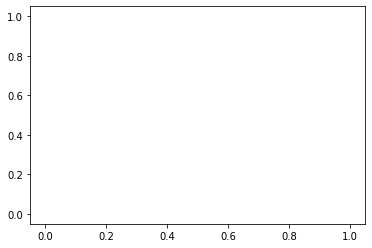

In [29]:
plt.plot(xs,ys + sep,color='#32384D',label='New SN (SNID $\phi = {:.0f}$)(Superfit $\phi = {:.0f}$)'.format(phase_obs_snid[0], phase_obs_superfit[0]),alpha=0.5)
#plt.plot(x,y- sep,color='#32384D' ,alpha=0.5)
#plt.plot(xi,yi - sep,color='#217CA3',label='SNID template (z = {:.3f})($\phi = {:.0f}$)'.format(i["z_snid_1"], i["age_1"]), lw=3)
#plt.plot(xsi,ysi + sep,color='#E29930',label='Superfit template (z = {:.3f})($\phi = {:.0f}$)'.format(i["Superfit_z"], i["Phase"]), lw=3)

In [132]:
i[0]

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,Resolution,Superfit_c,Superfit_z,Match,Gal,Frac(SN),Frac(gal),Phase,Av
str39,str12,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,str36,str18,float64,str52,str80,float64,float64,float64,float64
ZTF18abakunn_20191228_LT_v1.ascii,ZTF18abakunn,sn2005hf,12.44,0.0559,0.0047,1,1,sn2005hf,12.44,Ia-norm,0.0559,0.0047,12.9,0,3,sn2004aw,8.53,Ic-norm,0.0576,0.0081,18.4,0,6,sn02cx,7.6,Ia-02cx,0.0408,0.0073,10.3,0,7,sn2005cc,7.52,Ia-02cx,0.04,0.0079,9.5,0,12,sn2005nb,7.05,Ic-BL,0.058,0.0106,-3.5,0,ZTF18abakunn_20191228_LT_v1_10,Ia 91T-like,0.053864999999999996,Ia 91T-like/2013U/EFOSC2-NTT+2456354.7000694,/mnt/c/Users/20xha/Documents/Caltech/Research/superfit/bank/binnings/10A/gal/S0,0.34473956,0.65526044,56355.2,-0.8


In [82]:
j = "ZTF20abylbuf"
i = joined_table[np.where(joined_table["Version"] == "ZTF20abylbuf_20200910_P60_v1.ascii")][0]

spectra_name = i["Version"].split(".")[0]
z_snid = i["z_snid"]

source_folder = source + spectra_name
files = np.sort(glob.glob(source_folder+"/*.dat"))
if(len(files) == 0):
    source_folder = source2 + spectra_name
    files = np.sort(glob.glob(source_folder+"/*.dat"))

files = np.sort(files)
matches_files = files[0:len(files)-1]
spectra = Table.read(files[-1], format = "ascii", names = ["wavelength", "flux"])
match = Table.read(files[0], format = "ascii", names = ["redshifted_wavelength", "flux"])

low, high = 5300, 5700

x, y = spectra["wavelength"] / (1 + i["z_snid_1"]), spectra["flux"]
xi, yi = match["redshifted_wavelength"] / (1 + i["z_snid_1"]), match["flux"]

superfit_data = np.loadtxt(superfit_outputs + i["Resolution"] + "-0-.txt")
xs_temp, ys_temp = superfit_data[0], superfit_data[1]
xs, ys = [], []
for lam, flux in zip(xs_temp, ys_temp):
    if(flux > 0):
        xs.append(lam)
        ys.append(flux)
xsi, ysi = superfit_data[2], superfit_data[3]

xs = xs / (1+i["Superfit_z"])
xsi = xsi/ (1+i["Superfit_z"])

min_overlap = max(np.min(xsi), np.min(xi))
max_overlap = min(np.max(xsi), np.max(xi))
interp_grid = np.linspace(min_overlap, max_overlap, 10000)
snid_interp = interpolate.interp1d(xi, yi)
supy_interp = interpolate.interp1d(xsi, ysi)
sep_t = np.max(np.abs((supy_interp(interp_grid)) - (snid_interp(interp_grid))))

min_overlap_d = max(np.min(x), np.min(xs))
max_overlap_d = min(np.max(x), np.max(xs))
interp_grid_d = np.linspace(min_overlap_d, max_overlap_d, 10000)
snid_interp_d = interpolate.interp1d(x, y)
supy_interp_d = interpolate.interp1d(xs, ys)
sep_d = np.max(np.abs((supy_interp_d(interp_grid_d)) - (snid_interp_d(interp_grid_d))))

sep = max(sep_d, sep_t)/2 * 1.2

t_max = phase_data[np.where(phase_data["ZTFID"] == i["ZTF_Name"])]["peakt"] + 2458000

date_obs = i["Version"].split("_")[1]
astropy_t_obs = Time(date_obs[0:4] + "-" + date_obs[4:6] + "-" + date_obs[6::])
t_obs = astropy_t_obs.jd
phase_obs_snid = (t_obs-t_max)/(1 + i["z_snid_1"])
phase_obs_superfit = (t_obs-t_max)/(1 + i["Superfit_z"])

fig, ax = plt.subplots(figsize=(8,4.5))

if(i["Version"] in superfit_replacements["Version"]):
    superfit_phase = superfit_replacements[np.where(i["Version"] == superfit_replacements["Version"])[0]]["Phase"][0]
else:
    superfit_phase = i["Phase"]

ax.plot(xs,ys + sep,color='#32384D',label='New SN (SNID $\phi = {:.0f}$)(Superfit $\phi = {:.0f}$)'.format(phase_obs_snid[0], phase_obs_superfit[0]),alpha=0.5)
ax.plot(x,y- sep,color='#32384D' ,alpha=0.5)
ax.plot(xi,yi - sep,color='#217CA3',label='SNID template (z = {:.3f})($\phi = {:.0f}$)'.format(i["z_snid_1"], i["age_1"]), lw=3)

if(superfit_phase != "u"):
    ax.plot(xsi,ysi + sep,color='#E29930',label='Superfit template (z = {:.3f})($\phi = {:.0f}$)'.format(i["Superfit_z"], float(superfit_phase)), lw=3)
else:
    ax.plot(xsi,ysi + sep,color='#E29930',label='Superfit template (z = {:.3f})($\phi$ is unkown)'.format(i["Superfit_z"], lw=3))
    
ax.plot(x[-3],y[-3],color='#217CA3', lw=3)
ax.set_xlabel(r'Rest Frame Wavelength ($\mathrm{\AA}$)', fontsize=17)
ax.set_ylabel('Relative Flux', fontsize=17)
ax.tick_params(which='both',labelsize=15)

ax.grid(axis='x', color='0.7', ls=':')
ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.set_yticklabels([])

ax.text(0.565, 0.955, 'Superfit type: ',
        va='center',
        fontsize=15, transform=plt.gcf().transFigure)
ax.text(0.745, 0.955, i["Superfit_c"],
        color='#E29930', weight='bold', va='center',
        fontsize=23, transform=plt.gcf().transFigure)

ax.text(0.105, 0.955, 'SNID type: ',
        va='center',
        fontsize=15, transform=plt.gcf().transFigure)
ax.text(0.245, 0.955, i["c_snid_1"],
        color='#217CA3', weight='bold', va='center',
        fontsize=23, transform=plt.gcf().transFigure)

ax.text(0.850, 0.025, "Spec #" + str(1),
    va='center',
    fontsize=16, transform=plt.gcf().transFigure)
#spec_number_data.append(np.array([j, i["Version"], spec_num]))
#spec_num += 1

telescope = i["Version"].split("_")[-2]
ax.text(0.05, 0.025, "Telescope: " + telescope,
        va='center',
        fontsize=16, transform=plt.gcf().transFigure)

ax.set_xlim(min(np.min(x),np.min(xs)),max(np.max(x),np.max(xs)))

ax.legend(fancybox=True)
fig.subplots_adjust(left=0.055,right=0.99,top=0.925,bottom=0.145)

fig.savefig(output + j + '_' + i["Version"] + '.png', dpi = 600)
plt.show()
plt.close(fig)
plt.close()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [83]:
np.where(j == 

'ZTF18abvgjyv'

In [85]:
i["Phase"]

-1.1482177